# Pymaceuticals Inc.
---

### Analysis

The overall data shows the best drug regimens to treat tumors in mice are Capomulin and Ramicane.  Each of these drug regimens had the greatest population of mice tested with the lowest final tumor volume.  With no outliers to skew the data, the Capomulin and Ramicane regimens both had the lowest variations averaging about the same tumor volume, indicating a more consistent treatment outcome among the entire population tested.  

Studying a sample from the data for these two drug treatments showed that as treatment time increased, the number of tumors decreased modeling a negative linear regression.  Furthermore, graphing and calculating the mouse weight and tumor volume data from these same samples found a positive linear regression and high correlation (above 80%) between these variables to confidently state that the heavier the mouse, the larger the tumor. 

Though the overall population tested for all regimens shows almost an even split between genders, I would recommend further analysis to discover if there is a correlation between gender and drug regimens as this could be a variable in how well the drug interacts with the tumor overtime.


In [347]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study_complete_df = pd.merge(mouse_metadata, study_results, how = "left")

# Display the data table for preview

mouse_study_complete_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [348]:
# Checking the number of mice.
mouse_ID_unique = mouse_study_complete_df["Mouse ID"].nunique()
mouse_count

249

In [349]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice =  mouse_study_complete_df.loc[mouse_study_complete_df.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicate_mice

array(['g989'], dtype=object)

In [350]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mouse_ID =  mouse_study_complete_df.loc[mouse_study_complete_df["Mouse ID"] =="g989", :]
dup_mouse_ID

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [351]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data_df =  mouse_study_complete_df[mouse_study_complete_df["Mouse ID"].isin(duplicate_mice)==False]
clean_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [352]:
# Checking the number of mice in the clean DataFrame.
clean_data_mice_count_df = clean_data_df["Mouse ID"].nunique()
clean_data_mice_count_df 

248

## Summary Statistics

In [353]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

clean_data_mean_df = clean_data_df["Tumor Volume (mm3)"].groupby(clean_data_df["Drug Regimen"]).mean()
clean_data_median_df = clean_data_df["Tumor Volume (mm3)"].groupby(clean_data_df["Drug Regimen"]).median()                                                                 
clean_data_variance_df = clean_data_df["Tumor Volume (mm3)"].groupby(clean_data_df["Drug Regimen"]).var()
clean_data_std_df = clean_data_df["Tumor Volume (mm3)"].groupby(clean_data_df["Drug Regimen"]).std() 
clean_data_sem_df = clean_data_df["Tumor Volume (mm3)"].groupby(clean_data_df["Drug Regimen"]).sem() 
                                                                 
stats_summary_table = pd.DataFrame({"Tumor Volume (mm3) Mean": clean_data_mean_df,
                        "Tumor Volume (mm3) Median": clean_data_median_df,
                        "Tumor Volume (mm3) Variance": clean_data_variance_df,
                        "Tumor Volume (mm3) Std Dev": clean_data_std_df,
                        "Tumor Volume (mm3) Std Error": clean_data_sem_df})

stats_summary_table                                                                 

,Tumor Volume (mm3) Mean,Tumor Volume (mm3) Median,Tumor Volume (mm3) Variance,Tumor Volume (mm3) Std Dev,Tumor Volume (mm3) Std Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [354]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
stats_summary_agg = clean_data_df.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].agg(["mean", "median", "var", "std", "sem"])
stats_summary_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

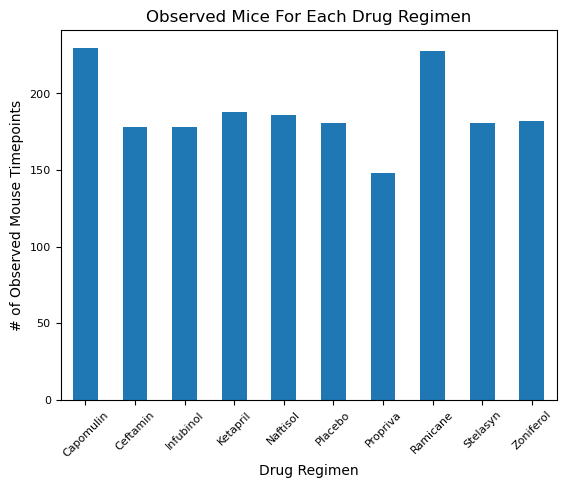

In [376]:
# Get total number of rows for each drug regimen
num_drug_regimens = clean_data_df.groupby(["Drug Regimen"]).count()["Mouse ID"]

# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
num_drug_regimens.plot(kind = "bar", title = "Observed Mice For Each Drug Regimen", rot = 45, fontsize=8)
plt.xlabel("Drug Regimen", fontsize=10)
plt.ylabel("# of Observed Mouse Timepoints", fontsize=10)

plt.savefig("BarGraph")
plt.show()

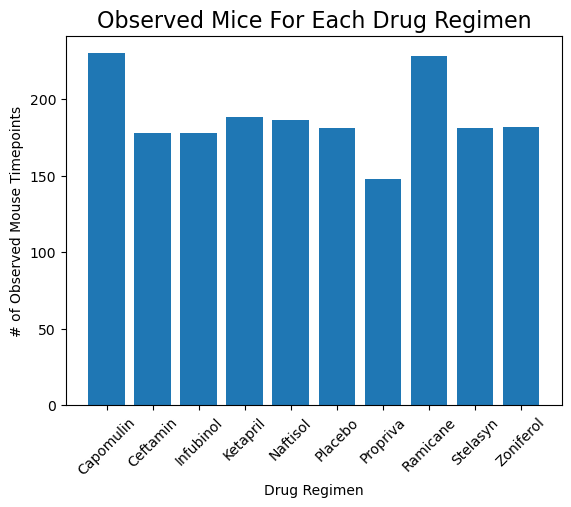

In [371]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(num_drug_regimens.index, num_drug_regimens.values)
plt.title("Observed Mice For Each Drug Regimen", fontsize = 16)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation = 45)

plt.savefig("BarGraph")
plt.show()

    

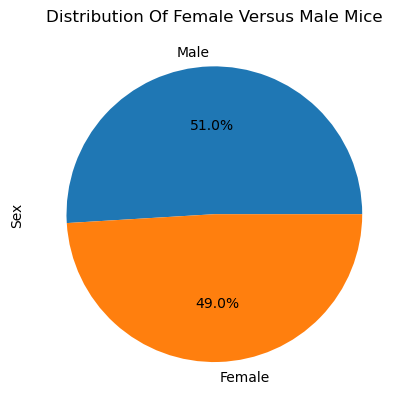

In [372]:
# Get gender count
mouse_gender = clean_data_df["Sex"].value_counts()

# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_gender.plot.pie(autopct = "%1.1f%%")
plt.title("Distribution Of Female Versus Male Mice")
plt.ylabel("Sex")
plt.show()


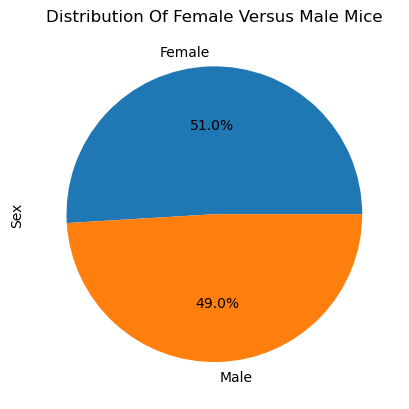

In [358]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

gender = ["Female", "Male"]
plt.pie(mouse_gender, labels = gender, autopct = "%1.1f%%")
plt.title("Distribution Of Female Versus Male Mice")
plt.ylabel("Sex")

plt.savefig("PieChart")
plt.show()


## Quartiles, Outliers and Boxplots

In [359]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
Timepoint_Max = clean_data_df.groupby(["Mouse ID"])["Timepoint"].max().reset_index()


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
Merge_df = Timepoint_Max.merge(clean_data_df, on=["Mouse ID", "Timepoint"], how = "left")
Merge_df


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


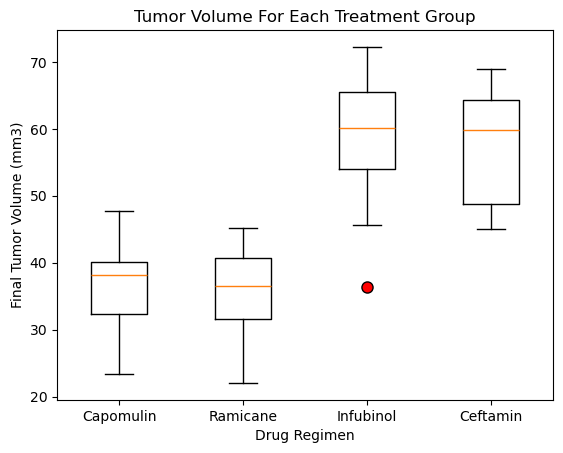

In [360]:
# Create empty list to fill with tumor vol data (for plotting)
drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
Drug_Regimen_Data= []

# Put treatments into a list for for loop (and later for plot labels)
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset 
for drug in drug_list:
    drug_list_data = Merge_df.loc[Merge_df["Drug Regimen"] == drug]
    final_tumor_total = drug_list_data.loc[drug_list_data["Timepoint"] == drug_list_data["Timepoint"]]["Tumor Volume (mm3)"]
    Drug_Regimen_Data.append(final_tumor_total)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Determine outliers using upper and lower bounds
for i, drug in enumerate(drug_list):
    quartiles = Drug_Regimen_Data[i].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

 
    outliers = Drug_Regimen_Data[i][(Drug_Regimen_Data[i] < lower_bound) | (Drug_Regimen_Data[i] > upper_bound)]

    print(f"{drug} potential outliers: {outliers}")
   
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

fig1, ax1 = plt.subplots()
ax1.boxplot(Drug_Regimen_Data, labels = drug_list, showfliers=True, flierprops=dict(marker='o', markerfacecolor='red', markersize=8))

ax1.set_title("Tumor Volume For Each Treatment Group")
ax1.set_xlabel("Drug Regimen")
ax1.set_ylabel("Final Tumor Volume (mm3)")

plt.savefig("boxplot")
plt.show()
    


## Line and Scatter Plots

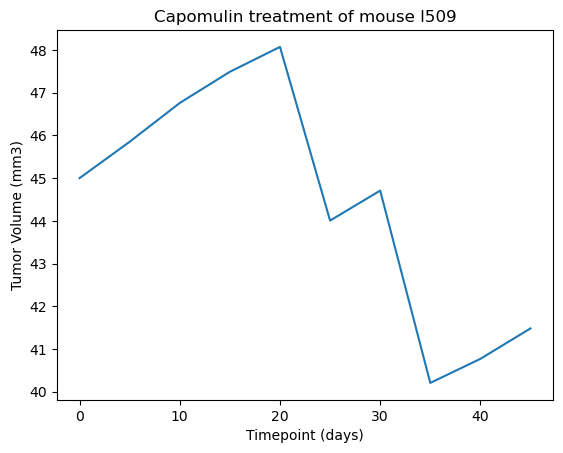

In [361]:
#Extract Capomulin data
Capomulin_lg_Data = clean_data_df[clean_data_df["Drug Regimen"] == "Capomulin"]
Capomulin_l509 = Capomulin_lg_Data.loc[Capomulin_lg_Data["Mouse ID"] == "l509",:]


# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
plt.plot(Capomulin_l509["Timepoint"], Capomulin_l509["Tumor Volume (mm3)"])
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse l509")

plt.savefig("LineGraph")
plt.show()


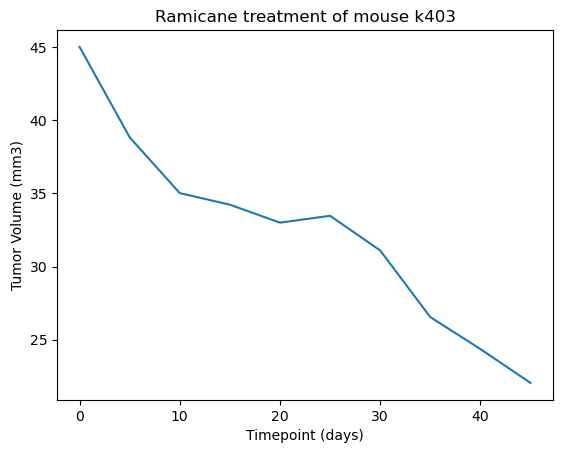

In [362]:
#Extract Ramicane data
Ramicane_lg_Data = clean_data_df[clean_data_df["Drug Regimen"] == "Ramicane"]
Ramicane_k403 = Ramicane_lg_Data.loc[Ramicane_lg_Data["Mouse ID"] == "k403",:]


# Generate a line plot of tumor volume vs. time point for a single mouse treated with Ramicane
plt.plot(Ramicane_k403["Timepoint"], Ramicane_k403["Tumor Volume (mm3)"])
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Ramicane treatment of mouse k403")

plt.show()


          Weight (g)  Tumor Volume (mm3)
Mouse ID                                
b128            22.0           41.963636
b742            21.0           40.083699
f966            17.0           36.505973
g288            19.0           41.990097
g316            22.0           44.613344
i557            24.0           44.805810
i738            20.0           39.141053
j119            23.0           44.465236
j246            21.0           43.216925
l509            21.0           44.434474
l897            19.0           42.507261
m601            17.0           34.847470
m957            19.0           39.049816
r157            25.0           45.798970
r554            17.0           36.509212
r944            25.0           43.367364
s185            17.0           34.559143
s710            23.0           42.803733
t565            17.0           39.328725
u364            17.0           39.887495
v923            21.0           41.581595
w150            23.0           41.384825
w914            

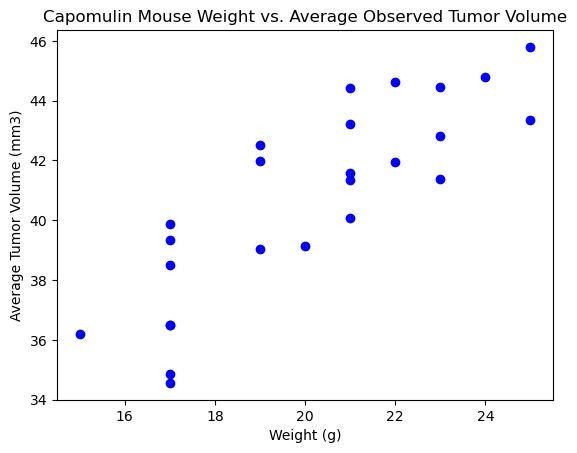

In [363]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
Capomulin_sp_Data = clean_data_df.loc[clean_data_df["Drug Regimen"] == "Capomulin",:]
Capomulin_Ave_Wgt = Capomulin_sp_Data.groupby("Mouse ID")[["Weight (g)","Tumor Volume (mm3)"]].mean()
print(Capomulin_Ave_Wgt)

plt.scatter(Capomulin_Ave_Wgt["Weight (g)"],Capomulin_Ave_Wgt["Tumor Volume (mm3)"], color = "b")
plt.title ("Capomulin Mouse Weight vs. Average Observed Tumor Volume")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.savefig("ScatterGraph")

In [364]:
# Gender breakdown by Mouse ID for Capomulin regimen
Gender = clean_data_df.loc[clean_data_df["Drug Regimen"] == "Capomulin", :]
Gender_Capomulin = Gender.groupby("Mouse ID")["Sex"].value_counts()
print(Gender_Capomulin)


Mouse ID  Sex   
b128      Female    10
b742      Male      10
f966      Male       5
g288      Male      10
g316      Female    10
i557      Female    10
i738      Female    10
j119      Female    10
j246      Female     8
l509      Male      10
l897      Male      10
m601      Male      10
m957      Female    10
r157      Male       4
r554      Female    10
r944      Male      10
s185      Female    10
s710      Female    10
t565      Female    10
u364      Male      10
v923      Female    10
w150      Male       3
w914      Male      10
x401      Female    10
y793      Male      10
Name: count, dtype: int64


In [365]:
# Gender breakdown by Mouse ID for Ramicane regimen
Gender = clean_data_df.loc[clean_data_df["Drug Regimen"] == "Ramicane", :]
Gender_Ramicane = Gender.groupby("Drug Regimen")[["Mouse ID", "Sex"]].value_counts()
print(Gender_Ramicane)


Drug Regimen  Mouse ID  Sex   
Ramicane      a411      Male      10
              j913      Female    10
              u196      Male      10
              s508      Male      10
              r811      Male      10
              q597      Male      10
              n364      Male      10
              m546      Male      10
              k403      Male      10
              a444      Female    10
              j989      Male      10
              i334      Female    10
              i177      Male      10
              g791      Male      10
              e662      Male      10
              d251      Female    10
              c758      Male      10
              a644      Female    10
              a520      Male      10
              z578      Male      10
              q610      Female     8
              c458      Female     7
              r921      Female     7
              y449      Male       4
              w678      Female     2
Name: count, dtype: int64


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


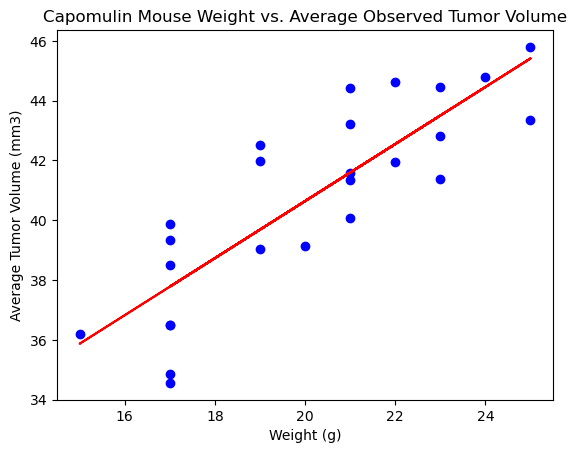

In [366]:
#Import lineregress pkg

from scipy.stats import linregress
from scipy import stats


#Calculate Graph Data
Capomulin_sp_Data = clean_data_df.loc[clean_data_df["Drug Regimen"] == "Capomulin",:]
Capomulin_Ave_Wgt = Capomulin_sp_Data.groupby("Mouse ID")[["Weight (g)","Tumor Volume (mm3)"]].mean()


# Calculate the correlation coefficient and a linear regression model 
correlation = st.pearsonr(Capomulin_Ave_Wgt['Weight (g)'],Capomulin_Ave_Wgt['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(Capomulin_Ave_Wgt["Weight (g)"],Capomulin_Ave_Wgt["Tumor Volume (mm3)"])
regress_values=Capomulin_Ave_Wgt["Weight (g)"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"


# Graph mouse weight and average observed tumor volume for the entire Capomulin regimen
plt.scatter(Capomulin_Ave_Wgt["Weight (g)"],Capomulin_Ave_Wgt["Tumor Volume (mm3)"], color = "b")
plt.title ("Capomulin Mouse Weight vs. Average Observed Tumor Volume")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.plot(Capomulin_Ave_Wgt["Weight (g)"], regress_values, color = "red")

plt.savefig("linearregression")

          Weight (g)  Tumor Volume (mm3)
Mouse ID                                
a411            22.0           40.701385
a444            25.0           43.060052
a520            21.0           37.989219
a644            17.0           41.228577
c458            20.0           42.269196
c758            17.0           41.868769
d251            19.0           39.640443
e662            24.0           44.268127
g791            16.0           37.489237
i177            18.0           37.882878
i334            20.0           40.033840
j913            17.0           39.128333
j989            19.0           40.108578
k403            16.0           32.358859
m546            16.0           38.807795
n364            17.0           37.287651
q597            25.0           43.604010
q610            21.0           43.183986
r811            19.0           39.647958
r921            25.0           43.859777
s508            17.0           36.050156
u196            25.0           45.576395
w678            

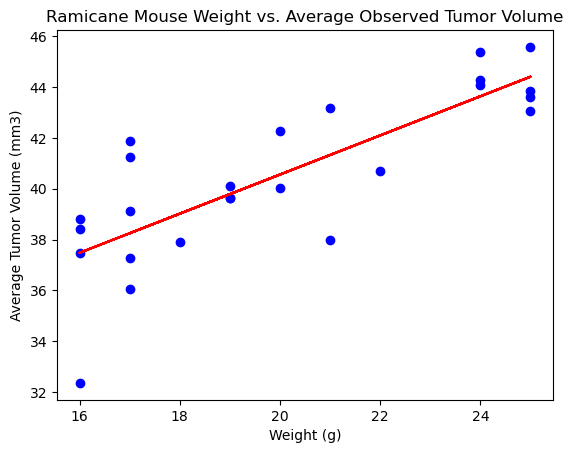

In [367]:
#Import lineregress pkg

from scipy.stats import linregress
from scipy import stats


#Calculate Graph Data
Ramicane_sp_Data = clean_data_df.loc[clean_data_df["Drug Regimen"] == "Ramicane",:]
Ramicane_Ave_Wgt = Ramicane_sp_Data.groupby("Mouse ID")[["Weight (g)","Tumor Volume (mm3)"]].mean()
print(Ramicane_Ave_Wgt)

# Calculate the correlation coefficient and a linear regression model 
correlation = st.pearsonr(Ramicane_Ave_Wgt['Weight (g)'],Ramicane_Ave_Wgt ['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(Ramicane_Ave_Wgt ["Weight (g)"],Ramicane_Ave_Wgt ["Tumor Volume (mm3)"])
regress_values=Ramicane_Ave_Wgt["Weight (g)"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"


# Graph mouse weight and average observed tumor volume for the entire Ramicane regimen
plt.scatter(Ramicane_Ave_Wgt["Weight (g)"],Ramicane_Ave_Wgt ["Tumor Volume (mm3)"], color = "b")
plt.title ("Ramicane Mouse Weight vs. Average Observed Tumor Volume")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.plot(Ramicane_Ave_Wgt["Weight (g)"], regress_values, color = "red")
